In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
import pickle
import re

from envs import MatrixGameEnv, MatrixGameEnv_no_history

from players import TitForTatPlayer, TitForTatThenDefectPlayer

import evaluation

import pandas as pd


/home/peter/anaconda3/lib/python3.8/site-packages/ray/autoscaler/_private/cli_logger.py:57: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
  warnings.warn(


In [2]:
import ray
from ray import tune
from ray.rllib.examples.env.multi_agent import MultiAgentCartPole
from ray.rllib.examples.models.shared_weights_model import \
    SharedWeightsModel1, SharedWeightsModel2, TF2SharedWeightsModel, \
    TorchSharedWeightsModel
from ray.rllib.models import ModelCatalog
# from ray.rllib.policy import PolicySpec
from ray.rllib.utils.framework import try_import_tf
from ray.rllib.utils.test_utils import check_learning_achieved
from ray.tune.registry import register_env

In [3]:
import ray
from ray.rllib.agents.ppo import PPOTrainer
from ray.rllib.agents.ppo import DEFAULT_CONFIG as DEFAULT_CONFIG_PPO

from ray.rllib.agents.dqn import DQNTrainer, DEFAULT_CONFIG 
from ray.rllib.agents.dqn import  DEFAULT_CONFIG as DEFAULT_CONFIG_DQN


from ray.tune.registry import register_env
from ray.tune.logger import pretty_print

ray.init(ignore_reinit_error=True, log_to_driver=False)

2021-11-12 14:29:38,827	INFO services.py:1245 -- View the Ray dashboard at http://127.0.0.1:8265


{'node_ip_address': '192.168.8.108',
 'raylet_ip_address': '192.168.8.108',
 'redis_address': '192.168.8.108:6379',
 'object_store_address': '/tmp/ray/session_2021-11-12_14-29-36_869852_186526/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2021-11-12_14-29-36_869852_186526/sockets/raylet',
 'webui_url': '127.0.0.1:8265',
 'session_dir': '/tmp/ray/session_2021-11-12_14-29-36_869852_186526',
 'metrics_export_port': 64310,
 'node_id': '9efce8992ef17a0fc55edfeb2a927f8b25602a15a207c5088cd71f36'}

In [4]:
register_env('MG_t4td_env', lambda c: MatrixGameEnv(
    player2=TitForTatThenDefectPlayer(min_defect_turn=0, max_defect_turn=100)))

register_env('MG_t4t_env', lambda c: MatrixGameEnv(
    player2=TitForTatPlayer()))


In [6]:
base_dir = '/home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/'
exp_dir = 'DQN_single_t4td/'
cp_path = "/checkpoint_000100/checkpoint-100"


In [7]:
exps = os.listdir(base_dir+exp_dir)
test_exp = exps[0]

In [8]:
# run_dir = 'DQN_MG_t4t_env_3dc73_00000_0_gamma=0.999,lr=0.001,n_step=1_2021-08-13_15-33-36'
run_dir = 'DQN_MG_t4t_env_3dc73_00001_1_gamma=0.99,lr=0.001,n_step=1_2021-08-13_15-33-36'

In [9]:
test_exp

'DQN_MG_t4td_env_f7859_00006_6_gamma=0.99,lr=0.0001,n_step=1_2021-08-13_15-31-39'

In [10]:

path1 = base_dir+ exp_dir+test_exp
with open(path1 + '/params.pkl', 'rb') as f:
    data = pickle.load(f)

In [11]:
agent = DQNTrainer(config=data)

2021-08-16 14:18:27,349	INFO trainer.py:718 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
2021-08-16 14:18:27,505	WARNING util.py:55 -- Install gputil for GPU system monitoring.


In [12]:
agent.restore(path1+ cp_path)

2021-08-16 14:18:27,594	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/DQN_single_t4td/DQN_MG_t4td_env_f7859_00006_6_gamma=0.99,lr=0.0001,n_step=1_2021-08-13_15-31-39/checkpoint_000100/checkpoint-100
2021-08-16 14:18:27,595	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 6167.652756929398, '_episodes_total': 1000}


In [13]:
agent.compute_action(np.random.rand(400))

2021-08-16 14:18:27,600	WARNING deprecation.py:33 -- DeprecationWarning: `compute_action` has been deprecated. Use `compute_single_action` instead. This will raise an error in the future!


1

In [14]:
evaluation.is_t4t(agent, 10000)

((0.6904,), 0.3377)

In [15]:
evaluation.is_t4t(agent, 10000)

((0.6755,), 0.3339)

In [16]:
rand_agent = evaluation.test_random_agent(coop_frac=0.8)
t4t_agent = evaluation.test_t4t_agent()

In [17]:
evaluation.is_t4t(rand_agent, 10000)

((0.4966,), 0.8064)

In [44]:
base_dir = '/home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/'
exp_dir = 'DQN_single_t4t/'
exp_dir = 'DQN_single_t4td/'

cp_path = "/checkpoint_000100/checkpoint-100"
exps = os.listdir(base_dir+exp_dir)
test_exp = exps[0]

In [45]:

t4t_frac = []
coop_frac = []
for test_exp in exps:
    path1 = base_dir+ exp_dir+test_exp
# path1 = base_dir+ exp_dir+run_dir

# path1='/home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/DQN_single_t4t'
# path1='/home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/DQN_single_t4t/DQN_MG_t4t_env_3dc73_00000_0_gamma=0.999,lr=0.001,n_step=1_2021-08-13_15-33-36'
    
    if os.path.exists(path1 + cp_path):
        with open(path1 + '/params.pkl', 'rb') as f:
            data = pickle.load(f)
        agent = DQNTrainer(config=data)
        agent.restore(path1+ cp_path, )
        t_frac, c_frac = evaluation.is_t4t(agent,100)
        t4t_frac.append(t_frac[0])
        coop_frac.append(c_frac)

Exception: Unknown config parameter `use_critic` 

In [78]:
attributes = ['gamma', 'lr', 'n_step']
data_names = ['episode_reward_max', 'episode_reward_min', 'episode_reward_mean']
data1 = pd.DataFrame(columns=['ID']+attributes+data_names)

In [104]:
base_dir = '/home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/'
exp_dir = 'DQN_single_t4t/'
env_pref = 'DQN_MG_t4t_env'

# exp_dir = 'DQN_single_t4td/'
# env_pref = 'DQN_MG_t4td_env'

cp_path = "/checkpoint_000100/checkpoint-100"
exps = os.listdir(base_dir+exp_dir)
test_exp = exps[0]

In [105]:

re_dict = {}
for attr in attributes:
    p = re.compile(attr + '=[^_^,]*')
    re_dict[attr] = p
    
data_names = ['episode_reward_max', 'episode_reward_min', 'episode_reward_mean']
data1 = pd.DataFrame(columns=['ID']+attributes+data_names)

for test_exp in exps:
    
    path1 = base_dir+ exp_dir+test_exp

    if os.path.isdir(path1) and (env_pref in test_exp):
#         print(filename)

        append_dict = {}
        append_dict['ID'] = test_exp
        has_none = False
        for attr in attributes:
            p = re_dict[attr]
            val_str = p.findall(test_exp)
            if not val_str:
                val = None
#                 print(at)
                has_none = True
                break

            else:
                val = val_str[0][len(attr)+1:]
                val = float(val)
            append_dict[attr] = val
            if os.path.exists(path1 + cp_path):
#                 print('hi')
                progress_csv = pd.read_csv(path1+'/progress.csv')
                
                for data_name in data_names:
                    vals = progress_csv[data_name].to_numpy()
                    append_dict[data_name] = vals
                    append_dict['final_' + data_name] = vals[-1]
                    
                with open(path1 + '/params.pkl', 'rb') as f:
                    data = pickle.load(f)
                agent = DQNTrainer(config=data)
                agent.restore(path1+ cp_path, )
                t_frac, c_frac = evaluation.is_t4t(agent,100)
                
                append_dict['t4t_frac'] = t_frac
                append_dict['coop_frac'] = c_frac
                
            else:
                has_none = True
                break

        if not has_none:
            data1 = data1.append(append_dict,ignore_index=True)
#             print(append_dict)

2021-08-16 21:22:29,334	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-16 21:22:29,380	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/DQN_single_t4t/DQN_MG_t4t_env_3dc73_00000_0_gamma=0.999,lr=0.001,n_step=1_2021-08-13_15-33-36/checkpoint_000100/checkpoint-100
2021-08-16 21:22:29,383	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 5087.005356788635, '_episodes_total': 1000}
2021-08-16 21:22:29,961	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-16 21:22:30,002	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/DQN_single_t4t/DQN_MG_t4t_env_3dc73_00000_0_gamma=0.999,lr=0.001,n_step=1_2021-08-13_15-33-36/checkpoint_000100/checkpoint-100
2021-08-16 21:22:30,004	INFO trainable.py:390 -- Current state after restoring: {'_

In [107]:
data1.to_pickle(base_dir + exp_dir + 'data_save')

In [103]:
pd.read_pickle(base_dir + exp_dir + 'data_save')

,ID,gamma,lr,n_step,episode_reward_max,episode_reward_min,episode_reward_mean,coop_frac,final_episode_reward_max,final_episode_reward_mean,final_episode_reward_min,t4t_frac
0,"DQN_MG_t4td_env_f7859_00006_6_gamma=0.99,lr=0....",0.990,0.00010,1.0,"[210.0, 210.0, 220.0, 258.0, 258.0, 258.0, 264...","[69.0, 60.0, 60.0, 60.0, 34.0, 34.0, 34.0, 34....","[128.3, 127.7, 131.53333333333333, 137.525, 14...",0.32,261.0,187.97,103.0,"(0.69,)"
1,"DQN_MG_t4td_env_f7859_00013_13_gamma=0.9,lr=5e...",0.900,0.00005,1.0,"[227.0, 227.0, 227.0, 227.0, 251.0, 251.0, 270...","[105.0, 58.0, 58.0, 58.0, 48.0, 48.0, 48.0, 48...","[158.0, 145.85, 131.6, 129.45, 136.84, 138.983...",0.56,276.0,192.04,101.0,"(0.75,)"
2,"DQN_MG_t4td_env_f7859_00009_9_gamma=0.8,lr=0.0...",0.800,0.00010,1.0,"[228.0, 230.0, 230.0, 246.0, 246.0, 246.0, 275...","[45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45....","[149.0, 146.15, 142.03333333333333, 141.675, 1...",0.52,292.0,205.26,100.0,"(0.71,)"
3,"DQN_MG_t4td_env_f7859_00017_17_gamma=0.95,lr=1...",0.950,0.00001,1.0,"[236.0, 236.0, 236.0, 236.0, 236.0, 236.0, 236...","[56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56....","[143.2, 159.4, 143.5, 137.85, 141.0, 138.91666...",0.60,268.0,162.80,68.0,"(0.65,)"
4,"DQN_MG_t4td_env_f7859_00036_36_gamma=0.99,lr=1...",0.990,0.00001,5.0,"[221.0, 235.0, 235.0, 235.0, 235.0, 235.0, 235...","[64.0, 64.0, 57.0, 56.0, 56.0, 56.0, 56.0, 56....","[132.4, 136.85, 132.73333333333332, 136.1, 134...",0.67,286.0,170.49,66.0,"(0.56,)"
5,"DQN_MG_t4td_env_f7859_00020_20_gamma=0.999,lr=...",0.999,0.00100,5.0,"[230.0, 237.0, 237.0, 237.0, 240.0, 240.0, 240...","[47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47....","[117.4, 139.45, 150.8, 146.95, 147.86, 147.65,...",0.53,284.0,181.51,38.0,"(0.62,)"
6,"DQN_MG_t4td_env_f7859_00001_1_gamma=0.99,lr=0....",0.990,0.00100,1.0,"[238.0, 238.0, 238.0, 238.0, 238.0, 238.0, 238...","[55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55....","[170.0, 147.0, 144.53333333333333, 141.25, 141...",0.42,258.0,187.30,87.0,"(0.58,)"
7,"DQN_MG_t4td_env_f7859_00011_11_gamma=0.99,lr=5...",0.990,0.00005,1.0,"[217.0, 217.0, 217.0, 249.0, 249.0, 249.0, 252...","[83.0, 63.0, 45.0, 37.0, 30.0, 30.0, 30.0, 30....","[143.8, 140.7, 140.3, 143.875, 141.7, 141.9833...",0.32,253.0,194.95,98.0,"(0.62,)"
8,"DQN_MG_t4td_env_f7859_00021_21_gamma=0.99,lr=0...",0.990,0.00100,5.0,"[220.0, 227.0, 227.0, 227.0, 227.0, 253.0, 253...","[57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57....","[146.9, 148.5, 140.4, 138.65, 135.78, 141.1833...",0.62,288.0,194.29,81.0,"(0.76,)"
9,"DQN_MG_t4td_env_f7859_00008_8_gamma=0.9,lr=0.0...",0.900,0.00010,1.0,"[238.0, 238.0, 238.0, 255.0, 255.0, 255.0, 255...","[62.0, 62.0, 62.0, 44.0, 41.0, 41.0, 38.0, 38....","[133.3, 139.25, 146.73333333333332, 147.125, 1...",0.55,293.0,199.58,102.0,"(0.79,)"


In [11]:
base_dir = '/home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/'
exp_dirs = ['DQN_single_t4t/', 'DQN_single_t4td/', 'DQN_single_t4t_small/', 'DQN_single_t4td_small/']
exp_dirs = [ 'DQN_single_t4t_small/', 'DQN_single_t4td_small/', 'DQN_single_t4t/', 'DQN_single_t4td/']


# env_pref = 'DQN_MG_t4t_env'
env_pref = 'DQN'

# exp_dir = 'DQN_single_t4td/'
# env_pref = 'DQN_MG_t4td_env'

cp_path = "/checkpoint_000200/checkpoint-200"

# attributes = ['gamma', 'lr']
# data_names = ['episode_reward_max', 'episode_reward_min', 'episode_reward_mean']
# data1 = pd.DataFrame(columns=['ID']+attributes+data_names)

In [12]:
for exp_dir in exp_dirs[0:3]:
    exps = os.listdir(base_dir+exp_dir)
    attributes = ['gamma', 'lr']
    data_names = ['episode_reward_max', 'episode_reward_min', 'episode_reward_mean']
    data1 = pd.DataFrame(columns=['ID']+attributes+data_names)

    
    re_dict = {}
    for attr in attributes:
        p = re.compile(attr + '=[^_^,]*')
        re_dict[attr] = p

    data_names = ['episode_reward_max', 'episode_reward_min', 'episode_reward_mean']
    data1 = pd.DataFrame(columns=['ID']+attributes+data_names)

    for test_exp in exps:

        path1 = base_dir+ exp_dir+test_exp

        if os.path.isdir(path1) and (env_pref in test_exp):
    #         print(filename)

            append_dict = {}
            append_dict['ID'] = test_exp
            has_none = False
            for attr in attributes:
                p = re_dict[attr]
                val_str = p.findall(test_exp)
                if not val_str:
                    val = None
    #                 print(at)
                    has_none = True
                    break

                else:
                    val = val_str[0][len(attr)+1:]
                    val = float(val)
                append_dict[attr] = val
                if os.path.exists(path1 + cp_path):
#                     print('hi')
                    progress_csv = pd.read_csv(path1+'/progress.csv')

                    for data_name in data_names:
                        vals = progress_csv[data_name].to_numpy()
                        append_dict[data_name] = vals
                        append_dict['final_' + data_name] = vals[-1]

                    with open(path1 + '/params.pkl', 'rb') as f:
                        data = pickle.load(f)
                    agent = DQNTrainer(config=data)
                    agent.restore(path1+ cp_path, )
                    t_frac, c_frac = evaluation.is_t4t(agent,1000)

                    append_dict['t4t_frac'] = t_frac
                    append_dict['coop_frac'] = c_frac

                else:
                    has_none = True
                    break

            if not has_none:
                data1 = data1.append(append_dict,ignore_index=True)
    #             print(append_dict)
    print(data1)
    data1.to_pickle(base_dir + exp_dir + 'data_save')

2021-08-24 12:47:05,450	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 12:47:05,481	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t_small/DQN_MG_t4t_env_81af5_00093_93_gamma=0.96,lr=0.001_2021-08-20_19-55-22/checkpoint_000200/checkpoint-200
2021-08-24 12:47:05,487	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 4194.188031196594, '_episodes_total': 2000}
2021-08-24 12:47:08,724	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 12:47:09,007	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t_small/DQN_MG_t4t_env_81af5_00093_93_gamma=0.96,lr=0.001_2021-08-20_19-55-22/checkpoint_000200/checkpoint-200
2021-08-24 12:47:09,008	INFO trainable.py:390 -- Current state after re

2021-08-24 12:47:58,226	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 12:47:58,233	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t_small/DQN_MG_t4t_env_81af5_00059_59_gamma=0.98,lr=3e-05_2021-08-20_16-28-04/checkpoint_000200/checkpoint-200
2021-08-24 12:47:58,234	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 4067.1796696186066, '_episodes_total': 2000}
2021-08-24 12:48:03,330	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 12:48:03,352	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t_small/DQN_MG_t4t_env_81af5_00038_38_gamma=0.96,lr=3e-06_2021-08-20_15-17-14/checkpoint_000200/checkpoint-200
2021-08-24 12:48:03,353	INFO trainable.py:390 -- Current state after r

2021-08-24 12:48:54,259	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 12:48:54,274	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t_small/DQN_MG_t4t_env_81af5_00043_43_gamma=0.5,lr=3e-06_2021-08-20_15-18-11/checkpoint_000200/checkpoint-200
2021-08-24 12:48:54,275	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 4116.2009954452515, '_episodes_total': 2000}
2021-08-24 12:48:57,374	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 12:48:57,395	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t_small/DQN_MG_t4t_env_81af5_00043_43_gamma=0.5,lr=3e-06_2021-08-20_15-18-11/checkpoint_000200/checkpoint-200
2021-08-24 12:48:57,398	INFO trainable.py:390 -- Current state after res

2021-08-24 12:49:42,318	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 12:49:42,327	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t_small/DQN_MG_t4t_env_81af5_00140_140_gamma=0.8,lr=0.1_2021-08-21_00-34-27/checkpoint_000200/checkpoint-200
2021-08-24 12:49:42,327	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 4131.25491642952, '_episodes_total': 2000}
2021-08-24 12:49:45,501	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 12:49:45,524	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t_small/DQN_MG_t4t_env_81af5_00000_0_gamma=0.99999,lr=1e-07_2021-08-20_11-52-27/checkpoint_000200/checkpoint-200
2021-08-24 12:49:45,524	INFO trainable.py:390 -- Current state after res

2021-08-24 12:50:28,764	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 12:50:28,775	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t_small/DQN_MG_t4t_env_81af5_00137_137_gamma=0.96,lr=0.1_2021-08-21_00-33-48/checkpoint_000200/checkpoint-200
2021-08-24 12:50:28,778	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 4249.193225622177, '_episodes_total': 2000}
2021-08-24 12:50:31,838	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 12:50:31,852	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t_small/DQN_MG_t4t_env_81af5_00137_137_gamma=0.96,lr=0.1_2021-08-21_00-33-48/checkpoint_000200/checkpoint-200
2021-08-24 12:50:31,853	INFO trainable.py:390 -- Current state after rest

2021-08-24 12:51:41,860	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 12:51:41,874	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t_small/DQN_MG_t4t_env_81af5_00129_129_gamma=0.8,lr=0.03_2021-08-20_23-24-58/checkpoint_000200/checkpoint-200
2021-08-24 12:51:41,875	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 4132.458847045898, '_episodes_total': 2000}
2021-08-24 12:51:54,718	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 12:51:54,746	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t_small/DQN_MG_t4t_env_81af5_00012_12_gamma=0.9999,lr=3e-07_2021-08-20_11-52-28/checkpoint_000200/checkpoint-200
2021-08-24 12:51:54,748	INFO trainable.py:390 -- Current state after r

2021-08-24 12:52:59,886	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 12:52:59,904	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t_small/DQN_MG_t4t_env_81af5_00097_97_gamma=0.7,lr=0.001_2021-08-20_21-03-47/checkpoint_000200/checkpoint-200
2021-08-24 12:52:59,909	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 4129.926383018494, '_episodes_total': 2000}
2021-08-24 12:53:03,582	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 12:53:03,590	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t_small/DQN_MG_t4t_env_81af5_00097_97_gamma=0.7,lr=0.001_2021-08-20_21-03-47/checkpoint_000200/checkpoint-200
2021-08-24 12:53:03,591	INFO trainable.py:390 -- Current state after rest

2021-08-24 12:54:02,487	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 12:54:02,575	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t_small/DQN_MG_t4t_env_81af5_00020_20_gamma=0.7,lr=3e-07_2021-08-20_13-00-46/checkpoint_000200/checkpoint-200
2021-08-24 12:54:02,576	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 4081.1420559883118, '_episodes_total': 2000}
2021-08-24 12:54:13,933	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 12:54:14,011	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t_small/DQN_MG_t4t_env_81af5_00028_28_gamma=0.95,lr=1e-06_2021-08-20_14-08-57/checkpoint_000200/checkpoint-200
2021-08-24 12:54:14,013	INFO trainable.py:390 -- Current state after re

2021-08-24 12:55:16,870	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 12:55:16,879	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t_small/DQN_MG_t4t_env_81af5_00108_108_gamma=0.7,lr=0.003_2021-08-20_21-06-02/checkpoint_000200/checkpoint-200
2021-08-24 12:55:16,880	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 4152.243482589722, '_episodes_total': 2000}
2021-08-24 12:55:21,161	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 12:55:21,199	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t_small/DQN_MG_t4t_env_81af5_00108_108_gamma=0.7,lr=0.003_2021-08-20_21-06-02/checkpoint_000200/checkpoint-200
2021-08-24 12:55:21,200	INFO trainable.py:390 -- Current state after re

2021-08-24 12:56:19,692	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 12:56:19,717	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t_small/DQN_MG_t4t_env_81af5_00146_146_gamma=0.99,lr=0.3_2021-08-21_01-43-03/checkpoint_000200/checkpoint-200
2021-08-24 12:56:19,725	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3587.913182735443, '_episodes_total': 2000}
2021-08-24 12:56:23,570	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 12:56:23,612	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t_small/DQN_MG_t4t_env_81af5_00033_33_gamma=0.99999,lr=3e-06_2021-08-20_14-09-29/checkpoint_000200/checkpoint-200
2021-08-24 12:56:23,613	INFO trainable.py:390 -- Current state after 

2021-08-24 12:57:17,069	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 12:57:17,089	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t_small/DQN_MG_t4t_env_81af5_00074_74_gamma=0.8,lr=0.0001_2021-08-20_18-44-57/checkpoint_000200/checkpoint-200
2021-08-24 12:57:17,091	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 4118.185186624527, '_episodes_total': 2000}
2021-08-24 12:57:20,637	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 12:57:20,646	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t_small/DQN_MG_t4t_env_81af5_00074_74_gamma=0.8,lr=0.0001_2021-08-20_18-44-57/checkpoint_000200/checkpoint-200
2021-08-24 12:57:20,646	INFO trainable.py:390 -- Current state after re

2021-08-24 12:58:10,731	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 12:58:10,754	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t_small/DQN_MG_t4t_env_81af5_00019_19_gamma=0.8,lr=3e-07_2021-08-20_13-00-43/checkpoint_000200/checkpoint-200
2021-08-24 12:58:10,755	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 4093.2765069007874, '_episodes_total': 2000}
2021-08-24 12:58:14,967	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 12:58:14,979	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t_small/DQN_MG_t4t_env_81af5_00077_77_gamma=0.99999,lr=0.0003_2021-08-20_18-45-36/checkpoint_000200/checkpoint-200
2021-08-24 12:58:14,981	INFO trainable.py:390 -- Current state afte

2021-08-24 12:59:11,239	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 12:59:11,279	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t_small/DQN_MG_t4t_env_81af5_00026_26_gamma=0.98,lr=1e-06_2021-08-20_14-08-49/checkpoint_000200/checkpoint-200
2021-08-24 12:59:11,279	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 4070.599133491516, '_episodes_total': 2000}
2021-08-24 12:59:15,239	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 12:59:15,251	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t_small/DQN_MG_t4t_env_81af5_00026_26_gamma=0.98,lr=1e-06_2021-08-20_14-08-49/checkpoint_000200/checkpoint-200
2021-08-24 12:59:15,252	INFO trainable.py:390 -- Current state after re

2021-08-24 13:00:20,675	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:00:20,691	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t_small/DQN_MG_t4t_env_81af5_00116_116_gamma=0.95,lr=0.01_2021-08-20_22-14-42/checkpoint_000200/checkpoint-200
2021-08-24 13:00:20,692	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 4127.36593580246, '_episodes_total': 2000}
2021-08-24 13:00:25,790	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:00:25,819	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t_small/DQN_MG_t4t_env_81af5_00076_76_gamma=0.5,lr=0.0001_2021-08-20_18-45-09/checkpoint_000200/checkpoint-200
2021-08-24 13:00:25,820	INFO trainable.py:390 -- Current state after res

2021-08-24 13:01:37,873	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:01:37,893	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t_small/DQN_MG_t4t_env_81af5_00011_11_gamma=0.99999,lr=3e-07_2021-08-20_11-52-28/checkpoint_000200/checkpoint-200
2021-08-24 13:01:37,894	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 4089.6931211948395, '_episodes_total': 2000}
2021-08-24 13:01:42,620	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:01:42,647	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t_small/DQN_MG_t4t_env_81af5_00011_11_gamma=0.99999,lr=3e-07_2021-08-20_11-52-28/checkpoint_000200/checkpoint-200
2021-08-24 13:01:42,650	INFO trainable.py:390 -- Current state a

2021-08-24 13:02:39,395	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:02:39,407	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t_small/DQN_MG_t4t_env_81af5_00125_125_gamma=0.98,lr=0.03_2021-08-20_23-24-07/checkpoint_000200/checkpoint-200
2021-08-24 13:02:39,408	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 4178.1125230789185, '_episodes_total': 2000}
2021-08-24 13:02:43,161	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:02:43,184	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t_small/DQN_MG_t4t_env_81af5_00103_103_gamma=0.98,lr=0.003_2021-08-20_21-04-46/checkpoint_000200/checkpoint-200
2021-08-24 13:02:43,185	INFO trainable.py:390 -- Current state after 

2021-08-24 13:03:34,494	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3610.649632692337, '_episodes_total': 2000}
2021-08-24 13:03:37,982	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:03:38,004	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t_small/DQN_MG_t4t_env_81af5_00057_57_gamma=0.999,lr=3e-05_2021-08-20_16-27-24/checkpoint_000200/checkpoint-200
2021-08-24 13:03:38,005	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 4096.93411231041, '_episodes_total': 2000}
2021-08-24 13:03:42,238	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:03:42,250	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single

2021-08-24 13:04:28,898	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 4067.265303850174, '_episodes_total': 2000}
2021-08-24 13:04:32,287	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:04:32,300	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t_small/DQN_MG_t4t_env_81af5_00004_4_gamma=0.98,lr=1e-07_2021-08-20_11-52-27/checkpoint_000200/checkpoint-200
2021-08-24 13:04:32,301	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 4067.265303850174, '_episodes_total': 2000}
2021-08-24 13:04:35,893	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:04:35,917	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_

2021-08-24 13:05:45,430	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 4084.78732919693, '_episodes_total': 2000}
2021-08-24 13:05:49,904	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:05:49,935	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t_small/DQN_MG_t4t_env_81af5_00050_50_gamma=0.95,lr=1e-05_2021-08-20_16-26-24/checkpoint_000200/checkpoint-200
2021-08-24 13:05:49,937	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 4127.44017124176, '_episodes_total': 2000}
2021-08-24 13:05:54,261	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:05:54,283	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t

2021-08-24 13:06:57,543	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 4092.7351496219635, '_episodes_total': 2000}
2021-08-24 13:07:02,770	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:07:02,782	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t_small/DQN_MG_t4t_env_81af5_00035_35_gamma=0.999,lr=3e-06_2021-08-20_14-10-05/checkpoint_000200/checkpoint-200
2021-08-24 13:07:02,783	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 4092.7351496219635, '_episodes_total': 2000}
2021-08-24 13:07:09,309	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:07:09,598	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_sin

2021-08-24 13:08:08,784	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 4149.371226072311, '_episodes_total': 2000}
2021-08-24 13:08:13,552	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:08:13,662	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t_small/DQN_MG_t4t_env_81af5_00139_139_gamma=0.9,lr=0.1_2021-08-21_00-34-04/checkpoint_000200/checkpoint-200
2021-08-24 13:08:13,663	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 4231.52711391449, '_episodes_total': 2000}
2021-08-24 13:08:19,097	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:08:19,115	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4

                                                    ID   gamma       lr  \
0    DQN_MG_t4t_env_81af5_00093_93_gamma=0.96,lr=0....  0.9600  0.00100   
1    DQN_MG_t4t_env_81af5_00047_47_gamma=0.99,lr=1e...  0.9900  0.00001   
2    DQN_MG_t4t_env_81af5_00113_113_gamma=0.99,lr=0...  0.9900  0.01000   
3    DQN_MG_t4t_env_81af5_00070_70_gamma=0.98,lr=0....  0.9800  0.00010   
4    DQN_MG_t4t_env_81af5_00068_68_gamma=0.999,lr=0...  0.9990  0.00010   
..                                                 ...     ...      ...   
149  DQN_MG_t4t_env_81af5_00123_123_gamma=0.999,lr=...  0.9990  0.03000   
150  DQN_MG_t4t_env_81af5_00139_139_gamma=0.9,lr=0....  0.9000  0.10000   
151  DQN_MG_t4t_env_81af5_00150_150_gamma=0.9,lr=0....  0.9000  0.30000   
152  DQN_MG_t4t_env_81af5_00149_149_gamma=0.95,lr=0...  0.9500  0.30000   
153  DQN_MG_t4t_env_81af5_00089_89_gamma=0.9999,lr=...  0.9999  0.00100   

                                    episode_reward_max  \
0    [249.0, 249.0, 254.0, 258.0, 280.0, 

2021-08-24 13:08:52,801	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:08:52,823	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4td_small/DQN_MG_t4td_env_12164_00116_116_gamma=0.95,lr=0.01_2021-08-20_09-03-03/checkpoint_000200/checkpoint-200
2021-08-24 13:08:52,825	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3478.6034846305847, '_episodes_total': 2000}
2021-08-24 13:08:57,314	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:08:57,321	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4td_small/DQN_MG_t4td_env_12164_00116_116_gamma=0.95,lr=0.01_2021-08-20_09-03-03/checkpoint_000200/checkpoint-200
2021-08-24 13:08:57,322	INFO trainable.py:390 -- Current state aft

2021-08-24 13:10:06,889	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3394.995297908783, '_episodes_total': 2000}
2021-08-24 13:10:12,245	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:10:12,414	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4td_small/DQN_MG_t4td_env_12164_00004_4_gamma=0.98,lr=1e-07_2021-08-20_00-22-08/checkpoint_000200/checkpoint-200
2021-08-24 13:10:12,416	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3394.995297908783, '_episodes_total': 2000}
2021-08-24 13:10:19,687	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:10:19,697	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_singl

2021-08-24 13:12:56,821	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3431.76198220253, '_episodes_total': 2000}
2021-08-24 13:13:01,757	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:13:01,770	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4td_small/DQN_MG_t4td_env_12164_00002_2_gamma=0.999,lr=1e-07_2021-08-20_00-22-08/checkpoint_000200/checkpoint-200
2021-08-24 13:13:01,772	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3415.354234457016, '_episodes_total': 2000}
2021-08-24 13:13:05,539	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:13:05,571	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_singl

2021-08-24 13:14:19,457	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3461.020483970642, '_episodes_total': 2000}
2021-08-24 13:14:25,338	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:14:25,356	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4td_small/DQN_MG_t4td_env_12164_00069_69_gamma=0.99,lr=0.0001_2021-08-20_05-10-33/checkpoint_000200/checkpoint-200
2021-08-24 13:14:25,357	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3461.020483970642, '_episodes_total': 2000}
2021-08-24 13:14:29,388	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:14:29,405	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_sin

2021-08-24 13:16:15,543	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3433.7180161476135, '_episodes_total': 2000}
2021-08-24 13:16:24,217	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:16:24,374	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4td_small/DQN_MG_t4td_env_12164_00067_67_gamma=0.9999,lr=0.0001_2021-08-20_05-10-30/checkpoint_000200/checkpoint-200
2021-08-24 13:16:24,375	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3426.7779812812805, '_episodes_total': 2000}
2021-08-24 13:16:31,413	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:16:31,445	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN

2021-08-24 13:17:33,650	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3484.4023292064667, '_episodes_total': 2000}
2021-08-24 13:17:39,809	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:17:39,824	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4td_small/DQN_MG_t4td_env_12164_00092_92_gamma=0.98,lr=0.001_2021-08-20_07-06-49/checkpoint_000200/checkpoint-200
2021-08-24 13:17:39,825	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3484.4023292064667, '_episodes_total': 2000}
2021-08-24 13:17:44,550	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:17:44,563	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_si

2021-08-24 13:18:51,739	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3402.481601715088, '_episodes_total': 2000}
2021-08-24 13:18:57,721	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:18:57,769	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4td_small/DQN_MG_t4td_env_12164_00025_25_gamma=0.99,lr=1e-06_2021-08-20_02-16-02/checkpoint_000200/checkpoint-200
2021-08-24 13:18:57,770	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3411.2702107429504, '_episodes_total': 2000}
2021-08-24 13:19:06,211	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:19:06,256	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_sin

2021-08-24 13:20:08,701	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3469.082751750946, '_episodes_total': 2000}
2021-08-24 13:20:14,018	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:20:14,065	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4td_small/DQN_MG_t4td_env_12164_00086_86_gamma=0.7,lr=0.0003_2021-08-20_07-05-33/checkpoint_000200/checkpoint-200
2021-08-24 13:20:14,067	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3469.082751750946, '_episodes_total': 2000}
2021-08-24 13:20:18,454	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:20:18,473	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_sing

2021-08-24 13:21:22,509	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3497.31396985054, '_episodes_total': 2000}
2021-08-24 13:21:27,619	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:21:27,678	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4td_small/DQN_MG_t4td_env_12164_00006_6_gamma=0.95,lr=1e-07_2021-08-20_00-22-08/checkpoint_000200/checkpoint-200
2021-08-24 13:21:27,679	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3419.83270072937, '_episodes_total': 2000}
2021-08-24 13:21:32,406	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:21:32,421	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_

2021-08-24 13:22:39,263	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3426.445435523987, '_episodes_total': 2000}
2021-08-24 13:22:44,401	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:22:44,419	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4td_small/DQN_MG_t4td_env_12164_00064_64_gamma=0.7,lr=3e-05_2021-08-20_05-09-50/checkpoint_000200/checkpoint-200
2021-08-24 13:22:44,421	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3426.445435523987, '_episodes_total': 2000}
2021-08-24 13:22:58,455	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:22:58,479	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_singl

2021-08-24 13:24:25,404	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3429.9859035015106, '_episodes_total': 2000}
2021-08-24 13:24:31,914	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:24:31,951	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4td_small/DQN_MG_t4td_env_12164_00030_30_gamma=0.8,lr=1e-06_2021-08-20_02-16-52/checkpoint_000200/checkpoint-200
2021-08-24 13:24:31,952	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3463.597155570984, '_episodes_total': 2000}
2021-08-24 13:24:36,545	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:24:36,555	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_sing

2021-08-24 13:25:44,349	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3454.4103939533234, '_episodes_total': 2000}
2021-08-24 13:25:51,948	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:25:51,962	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4td_small/DQN_MG_t4td_env_12164_00024_24_gamma=0.999,lr=1e-06_2021-08-20_01-19-45/checkpoint_000200/checkpoint-200
2021-08-24 13:25:51,963	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3454.4103939533234, '_episodes_total': 2000}
2021-08-24 13:26:01,037	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:26:01,085	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_s

2021-08-24 13:30:00,869	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:30:00,911	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4td_small/DQN_MG_t4td_env_12164_00042_42_gamma=0.7,lr=3e-06_2021-08-20_03-14-44/checkpoint_000200/checkpoint-200
2021-08-24 13:30:00,913	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3455.9193642139435, '_episodes_total': 2000}
2021-08-24 13:30:05,670	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:30:05,687	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4td_small/DQN_MG_t4td_env_12164_00042_42_gamma=0.7,lr=3e-06_2021-08-20_03-14-44/checkpoint_000200/checkpoint-200
2021-08-24 13:30:05,687	INFO trainable.py:390 -- Current state after

2021-08-24 13:31:28,227	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3470.4095203876495, '_episodes_total': 2000}
2021-08-24 13:31:32,524	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:31:32,531	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4td_small/DQN_MG_t4td_env_12164_00066_66_gamma=0.99999,lr=0.0001_2021-08-20_05-10-29/checkpoint_000200/checkpoint-200
2021-08-24 13:31:32,532	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3470.4095203876495, '_episodes_total': 2000}
2021-08-24 13:31:37,302	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:31:37,351	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQ

2021-08-24 13:32:38,516	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3482.97216796875, '_episodes_total': 2000}
2021-08-24 13:32:42,623	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:32:42,646	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4td_small/DQN_MG_t4td_env_12164_00035_35_gamma=0.999,lr=3e-06_2021-08-20_02-17-24/checkpoint_000200/checkpoint-200
2021-08-24 13:32:42,650	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3436.1515502929688, '_episodes_total': 2000}
2021-08-24 13:32:46,907	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:32:46,926	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_sin

2021-08-24 13:34:07,817	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3002.5378782749176, '_episodes_total': 2000}
2021-08-24 13:34:14,986	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:34:15,025	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4td_small/DQN_MG_t4td_env_12164_00151_151_gamma=0.8,lr=0.3_2021-08-20_11-57-57/checkpoint_000200/checkpoint-200
2021-08-24 13:34:15,027	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3002.5378782749176, '_episodes_total': 2000}
2021-08-24 13:34:22,401	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:34:22,436	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_sing

2021-08-24 13:35:28,526	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3476.044493675232, '_episodes_total': 2000}
2021-08-24 13:35:33,049	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:35:34,213	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4td_small/DQN_MG_t4td_env_12164_00108_108_gamma=0.7,lr=0.003_2021-08-20_08-06-13/checkpoint_000200/checkpoint-200
2021-08-24 13:35:34,213	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3457.8686349391937, '_episodes_total': 2000}
2021-08-24 13:35:40,160	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:35:40,745	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_sin

2021-08-24 13:36:54,743	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3459.2873845100403, '_episodes_total': 2000}
2021-08-24 13:36:59,337	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:36:59,345	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4td_small/DQN_MG_t4td_env_12164_00099_99_gamma=0.99999,lr=0.003_2021-08-20_08-03-56/checkpoint_000200/checkpoint-200
2021-08-24 13:36:59,346	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3459.2873845100403, '_episodes_total': 2000}
2021-08-24 13:37:07,634	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:37:07,643	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN

2021-08-24 13:38:32,170	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3445.9014620780945, '_episodes_total': 2000}
2021-08-24 13:38:37,891	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:38:37,914	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4td_small/DQN_MG_t4td_env_12164_00123_123_gamma=0.999,lr=0.03_2021-08-20_10-00-33/checkpoint_000200/checkpoint-200
2021-08-24 13:38:37,915	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3478.4217207431793, '_episodes_total': 2000}
2021-08-24 13:38:43,411	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:38:43,428	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_s

2021-08-24 13:40:00,917	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3460.054885864258, '_episodes_total': 2000}
2021-08-24 13:40:06,528	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:40:06,537	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4td_small/DQN_MG_t4td_env_12164_00100_100_gamma=0.9999,lr=0.003_2021-08-20_08-04-17/checkpoint_000200/checkpoint-200
2021-08-24 13:40:06,538	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3460.054885864258, '_episodes_total': 2000}
2021-08-24 13:40:12,539	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:40:12,554	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_s

2021-08-24 13:41:18,707	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3487.6073503494263, '_episodes_total': 2000}
2021-08-24 13:41:24,319	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:41:24,356	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4td_small/DQN_MG_t4td_env_12164_00007_7_gamma=0.9,lr=1e-07_2021-08-20_00-22-08/checkpoint_000200/checkpoint-200
2021-08-24 13:41:24,359	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 3426.5259692668915, '_episodes_total': 2000}
2021-08-24 13:41:29,080	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:41:29,145	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_sing

                                                    ID    gamma            lr  \
0    DQN_MG_t4td_env_12164_00116_116_gamma=0.95,lr=...  0.95000  1.000000e-02   
1    DQN_MG_t4td_env_12164_00081_81_gamma=0.98,lr=0...  0.98000  3.000000e-04   
2    DQN_MG_t4td_env_12164_00134_134_gamma=0.999,lr...  0.99900  1.000000e-01   
3    DQN_MG_t4td_env_12164_00119_119_gamma=0.7,lr=0...  0.70000  1.000000e-02   
4    DQN_MG_t4td_env_12164_00120_120_gamma=0.5,lr=0...  0.50000  1.000000e-02   
..                                                 ...      ...           ...   
149  DQN_MG_t4td_env_12164_00007_7_gamma=0.9,lr=1e-...  0.90000  1.000000e-07   
150  DQN_MG_t4td_env_12164_00026_26_gamma=0.98,lr=1...  0.98000  1.000000e-06   
151  DQN_MG_t4td_env_12164_00055_55_gamma=0.99999,l...  0.99999  3.000000e-05   
152  DQN_MG_t4td_env_12164_00044_44_gamma=0.99999,l...  0.99999  1.000000e-05   
153  DQN_MG_t4td_env_12164_00141_141_gamma=0.7,lr=0...  0.70000  1.000000e-01   

                           

2021-08-24 13:42:15,857	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:42:15,903	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t/DQN_MG_t4t_env_6a836_00116_116_gamma=0.95,lr=0.01_2021-08-21_10-47-39/checkpoint_000200/checkpoint-200
2021-08-24 13:42:15,908	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 14850.798151493073, '_episodes_total': 2000}
2021-08-24 13:42:22,243	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:42:22,312	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t/DQN_MG_t4t_env_6a836_00116_116_gamma=0.95,lr=0.01_2021-08-21_10-47-39/checkpoint_000200/checkpoint-200
2021-08-24 13:42:22,316	INFO trainable.py:390 -- Current state after restoring: {'

2021-08-24 13:43:58,072	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:43:58,223	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t/DQN_MG_t4t_env_6a836_00148_148_gamma=0.96,lr=0.3_2021-08-21_22-18-41/checkpoint_000200/checkpoint-200
2021-08-24 13:43:58,224	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 12162.537464618683, '_episodes_total': 2000}
2021-08-24 13:44:05,102	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:44:05,136	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t/DQN_MG_t4t_env_6a836_00089_89_gamma=0.9999,lr=0.001_2021-08-21_03-06-39/checkpoint_000200/checkpoint-200
2021-08-24 13:44:05,138	INFO trainable.py:390 -- Current state after restoring: {

2021-08-24 13:45:43,495	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:45:43,558	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t/DQN_MG_t4t_env_6a836_00077_77_gamma=0.99999,lr=0.0003_2021-08-20_23-14-25/checkpoint_000200/checkpoint-200
2021-08-24 13:45:43,559	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 13852.228541851044, '_episodes_total': 2000}
2021-08-24 13:45:49,111	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:45:49,179	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t/DQN_MG_t4t_env_6a836_00077_77_gamma=0.99999,lr=0.0003_2021-08-20_23-14-25/checkpoint_000200/checkpoint-200
2021-08-24 13:45:49,182	INFO trainable.py:390 -- Current state after resto

2021-08-24 13:47:26,957	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:47:26,988	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t/DQN_MG_t4t_env_6a836_00139_139_gamma=0.9,lr=0.1_2021-08-21_18-40-20/checkpoint_000200/checkpoint-200
2021-08-24 13:47:26,989	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 13436.682188987732, '_episodes_total': 2000}
2021-08-24 13:47:33,813	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:47:33,874	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t/DQN_MG_t4t_env_6a836_00079_79_gamma=0.999,lr=0.0003_2021-08-20_23-16-36/checkpoint_000200/checkpoint-200
2021-08-24 13:47:33,877	INFO trainable.py:390 -- Current state after restoring: {'

2021-08-24 13:49:19,738	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:49:19,795	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t/DQN_MG_t4t_env_6a836_00009_9_gamma=0.7,lr=1e-07_2021-08-20_00-17-28/checkpoint_000200/checkpoint-200
2021-08-24 13:49:19,799	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 13712.543231964111, '_episodes_total': 2000}
2021-08-24 13:49:27,814	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:49:27,900	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t/DQN_MG_t4t_env_6a836_00009_9_gamma=0.7,lr=1e-07_2021-08-20_00-17-28/checkpoint_000200/checkpoint-200
2021-08-24 13:49:27,901	INFO trainable.py:390 -- Current state after restoring: {'_ite

2021-08-24 13:51:08,087	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:51:08,136	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t/DQN_MG_t4t_env_6a836_00019_19_gamma=0.8,lr=3e-07_2021-08-20_04-07-44/checkpoint_000200/checkpoint-200
2021-08-24 13:51:08,138	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 13739.005203008652, '_episodes_total': 2000}
2021-08-24 13:51:16,465	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:51:16,676	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t/DQN_MG_t4t_env_6a836_00080_80_gamma=0.99,lr=0.0003_2021-08-20_23-17-44/checkpoint_000200/checkpoint-200
2021-08-24 13:51:16,681	INFO trainable.py:390 -- Current state after restoring: {'

2021-08-24 13:53:05,581	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:53:05,622	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t/DQN_MG_t4t_env_6a836_00044_44_gamma=0.99999,lr=1e-05_2021-08-20_11-43-43/checkpoint_000200/checkpoint-200
2021-08-24 13:53:05,625	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 13255.211795091629, '_episodes_total': 2000}
2021-08-24 13:53:13,113	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:53:13,150	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t/DQN_MG_t4t_env_6a836_00044_44_gamma=0.99999,lr=1e-05_2021-08-20_11-43-43/checkpoint_000200/checkpoint-200
2021-08-24 13:53:13,152	INFO trainable.py:390 -- Current state after restori

2021-08-24 13:55:11,618	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:55:11,778	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t/DQN_MG_t4t_env_6a836_00030_30_gamma=0.8,lr=1e-06_2021-08-20_07-56-05/checkpoint_000200/checkpoint-200
2021-08-24 13:55:11,781	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 13791.065261363983, '_episodes_total': 2000}
2021-08-24 13:55:17,167	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:55:17,255	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t/DQN_MG_t4t_env_6a836_00017_17_gamma=0.95,lr=3e-07_2021-08-20_04-07-17/checkpoint_000200/checkpoint-200
2021-08-24 13:55:17,255	INFO trainable.py:390 -- Current state after restoring: {'_

2021-08-24 13:57:01,030	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:57:01,349	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t/DQN_MG_t4t_env_6a836_00024_24_gamma=0.999,lr=1e-06_2021-08-20_04-09-15/checkpoint_000200/checkpoint-200
2021-08-24 13:57:01,352	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 13514.632448673248, '_episodes_total': 2000}
2021-08-24 13:57:08,009	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:57:08,066	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t/DQN_MG_t4t_env_6a836_00024_24_gamma=0.999,lr=1e-06_2021-08-20_04-09-15/checkpoint_000200/checkpoint-200
2021-08-24 13:57:08,071	INFO trainable.py:390 -- Current state after restoring: 

2021-08-24 13:59:23,356	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:59:23,380	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t/DQN_MG_t4t_env_6a836_00073_73_gamma=0.9,lr=0.0001_2021-08-20_23-01-46/checkpoint_000200/checkpoint-200
2021-08-24 13:59:23,382	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 13818.877436161041, '_episodes_total': 2000}
2021-08-24 13:59:33,429	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 13:59:33,469	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t/DQN_MG_t4t_env_6a836_00103_103_gamma=0.98,lr=0.003_2021-08-21_06-56-24/checkpoint_000200/checkpoint-200
2021-08-24 13:59:33,470	INFO trainable.py:390 -- Current state after restoring: {

2021-08-24 14:01:31,771	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 14:01:31,831	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t/DQN_MG_t4t_env_6a836_00113_113_gamma=0.99,lr=0.01_2021-08-21_10-41-45/checkpoint_000200/checkpoint-200
2021-08-24 14:01:31,833	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 14296.885845422745, '_episodes_total': 2000}
2021-08-24 14:01:38,989	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 14:01:39,019	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t/DQN_MG_t4t_env_6a836_00113_113_gamma=0.99,lr=0.01_2021-08-21_10-41-45/checkpoint_000200/checkpoint-200
2021-08-24 14:01:39,021	INFO trainable.py:390 -- Current state after restoring: {'

2021-08-24 14:03:19,681	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 14:03:19,728	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t/DQN_MG_t4t_env_6a836_00118_118_gamma=0.8,lr=0.01_2021-08-21_10-49-12/checkpoint_000200/checkpoint-200
2021-08-24 14:03:19,732	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 14570.305480241776, '_episodes_total': 2000}
2021-08-24 14:03:28,022	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 14:03:28,073	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t/DQN_MG_t4t_env_6a836_00027_27_gamma=0.96,lr=1e-06_2021-08-20_07-55-38/checkpoint_000200/checkpoint-200
2021-08-24 14:03:28,075	INFO trainable.py:390 -- Current state after restoring: {'_

2021-08-24 14:18:23,129	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 14:18:23,238	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t/DQN_MG_t4t_env_6a836_00053_53_gamma=0.7,lr=1e-05_2021-08-20_15-33-39/checkpoint_000200/checkpoint-200
2021-08-24 14:18:23,239	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 13801.87776875496, '_episodes_total': 2000}
2021-08-24 14:18:32,981	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 14:18:33,002	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t/DQN_MG_t4t_env_6a836_00053_53_gamma=0.7,lr=1e-05_2021-08-20_15-33-39/checkpoint_000200/checkpoint-200
2021-08-24 14:18:33,003	INFO trainable.py:390 -- Current state after restoring: {'_it

2021-08-24 14:45:53,996	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 14:45:54,146	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t/DQN_MG_t4t_env_6a836_00120_120_gamma=0.5,lr=0.01_2021-08-21_10-56-32/checkpoint_000200/checkpoint-200
2021-08-24 14:45:54,150	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 13769.31539773941, '_episodes_total': 2000}
2021-08-24 14:46:00,801	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 14:46:00,990	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t/DQN_MG_t4t_env_6a836_00061_61_gamma=0.95,lr=3e-05_2021-08-20_19-10-14/checkpoint_000200/checkpoint-200
2021-08-24 14:46:00,991	INFO trainable.py:390 -- Current state after restoring: {'_i

2021-08-24 14:48:01,430	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 14:48:01,495	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t/DQN_MG_t4t_env_6a836_00145_145_gamma=0.999,lr=0.3_2021-08-21_21-59-19/checkpoint_000200/checkpoint-200
2021-08-24 14:48:01,499	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 12312.414512872696, '_episodes_total': 2000}
2021-08-24 14:48:08,923	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 14:48:08,988	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t/DQN_MG_t4t_env_6a836_00145_145_gamma=0.999,lr=0.3_2021-08-21_21-59-19/checkpoint_000200/checkpoint-200
2021-08-24 14:48:08,990	INFO trainable.py:390 -- Current state after restoring: {'

2021-08-24 14:52:12,743	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 13567.078448295593, '_episodes_total': 2000}
2021-08-24 14:52:20,062	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 14:52:20,171	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t4t/DQN_MG_t4t_env_6a836_00023_23_gamma=0.9999,lr=1e-06_2021-08-20_04-08-52/checkpoint_000200/checkpoint-200
2021-08-24 14:52:20,175	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 13567.078448295593, '_episodes_total': 2000}
2021-08-24 14:52:27,600	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-24 14:52:27,683	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/DQN_single_t

RaySystemError: System error: Connection reset by peer

In [6]:
attributes = ['gamma', 'lr']
data_names = ['episode_reward_max', 'episode_reward_min', 'episode_reward_mean']
data1 = pd.DataFrame(columns=['ID']+attributes+data_names)

In [7]:
base_dir = '/home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/'
exp_dir = 'PPO_single_t4t/'
env_pref = 'PPO_MG_t4t_env'

exp_dir = 'PPO_single_t4td/'
env_pref = 'PPO_MG_t4td_env'

cp_path = "/checkpoint_000100/checkpoint-100"
exps = os.listdir(base_dir+exp_dir)
test_exp = exps[0]

In [8]:

re_dict = {}
for attr in attributes:
    p = re.compile(attr + '=[^_^,]*')
    re_dict[attr] = p
    
data_names = ['episode_reward_max', 'episode_reward_min', 'episode_reward_mean']
data1 = pd.DataFrame(columns=['ID']+attributes+data_names)

for test_exp in exps:
    
    path1 = base_dir+ exp_dir+test_exp

    if os.path.isdir(path1) and (env_pref in test_exp):
#         print(filename)

        append_dict = {}
        append_dict['ID'] = test_exp
        has_none = False
        for attr in attributes:
            p = re_dict[attr]
            val_str = p.findall(test_exp)
            if not val_str:
                val = None
#                 print(at)
                has_none = True
                break

            else:
                val = val_str[0][len(attr)+1:]
                val = float(val)
            append_dict[attr] = val
            if os.path.exists(path1 + cp_path):
#                 print('hi')
                progress_csv = pd.read_csv(path1+'/progress.csv')
                
                for data_name in data_names:
                    vals = progress_csv[data_name].to_numpy()
                    append_dict[data_name] = vals
                    append_dict['final_' + data_name] = vals[-1]
                    
                with open(path1 + '/params.pkl', 'rb') as f:
                    data = pickle.load(f)
                agent = PPOTrainer(config=data)
                agent.restore(path1+ cp_path, )
                t_frac, c_frac = evaluation.is_t4t(agent,100)
                
                append_dict['t4t_frac'] = t_frac
                append_dict['coop_frac'] = c_frac
                
            else:
                has_none = True
                break

        if not has_none:
            data1 = data1.append(append_dict,ignore_index=True)
#             print(append_dict)

2021-11-12 14:30:43,924	INFO trainer.py:718 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
2021-11-12 14:30:47,581	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-11-12 14:30:47,664	INFO trainable.py:382 -- Restored on 192.168.8.108 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/PPO_single_t4td/PPO_MG_t4td_env_65543_00006_6_gamma=0.99,lr=0.0001_2021-08-13_21-11-25/checkpoint_000100/checkpoint-100
2021-11-12 14:30:47,665	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 37362.994451761246, '_episodes_total': 4000}
2021-11-12 14:30:47,666	WARNING deprecation.py:33 -- DeprecationWarning: `compute_action` has been deprecated. Use `compute_single_action` instead. This will raise an error in the future!
2021-11-12 14:30:51,804	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-11-12 14:30:51

KeyboardInterrupt: 

In [15]:
base_dir = '/home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/'
exp_dirs = ['PPO_single_t4td/', 'PPO_single_t4t/', 'PPO_single_t4t_small/', 'PPO_single_t4td_small/']
# exp_dirs = ['PPO_single_t4t_small/', 'PPO_single_t4td_small/', 'PPO_single_t4td/', 'PPO_single_t4t/']
exp_dirs = ['PPO_single_t4t/']#, 'PPO_single_t4t/']
# exp_dirs = ['PPO_single_t4t_small/', 'PPO_single_t4td_small/']

# env_pref = 'DQN_MG_t4t_env'
env_pref = 'PPO'

# exp_dir = 'DQN_single_t4td/'
# env_pref = 'DQN_MG_t4td_env'

cp_path = "/checkpoint_000200/checkpoint-200"

attributes = ['gamma', 'lr']
data_names = ['episode_reward_max', 'episode_reward_min', 'episode_reward_mean']
data1 = pd.DataFrame(columns=['ID']+attributes+data_names)

In [16]:
for exp_dir in exp_dirs:
    exps = os.listdir(base_dir+exp_dir)

    
    re_dict = {}
    for attr in attributes:
        p = re.compile(attr + '=[^_^,]*')
        re_dict[attr] = p

    data_names = ['episode_reward_max', 'episode_reward_min', 'episode_reward_mean']
    data1 = pd.DataFrame(columns=['ID']+attributes+data_names)

    for test_exp in exps:

        path1 = base_dir+ exp_dir+test_exp

        if os.path.isdir(path1) and (env_pref in test_exp):
    #         print(filename)

            append_dict = {}
            append_dict['ID'] = test_exp
            has_none = False
            for attr in attributes:
                p = re_dict[attr]
                val_str = p.findall(test_exp)
                if not val_str:
                    val = None
    #                 print(at)
                    has_none = True
                    break

                else:
                    val = val_str[0][len(attr)+1:]
                    val = float(val)
                append_dict[attr] = val
                if os.path.exists(path1 + cp_path):
    #                 print('hi')
                    progress_csv = pd.read_csv(path1+'/progress.csv')

                    for data_name in data_names:
                        vals = progress_csv[data_name].to_numpy()
                        append_dict[data_name] = vals
                        append_dict['final_' + data_name] = vals[-1]

                    with open(path1 + '/params.pkl', 'rb') as f:
                        data = pickle.load(f)
                    agent = PPOTrainer(config=data)
                    agent.restore(path1+ cp_path, )
                    t_frac, c_frac = evaluation.is_t4t(agent,100)

                    append_dict['t4t_frac'] = t_frac
                    append_dict['coop_frac'] = c_frac

                else:
                    has_none = True
                    break

            if not has_none:
                data1 = data1.append(append_dict,ignore_index=True)
    #             print(append_dict)
    data1.to_pickle(base_dir + exp_dir + 'data_save')

2021-11-12 16:04:59,950	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-11-12 16:05:00,089	INFO trainable.py:382 -- Restored on 192.168.8.108 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/PPO_single_t4t/PPO_MG_t4t_env_713d3_00100_100_gamma=0.9999,lr=0.003_2021-09-09_01-53-29/checkpoint_000200/checkpoint-200
2021-11-12 16:05:00,091	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 138115.69003486633, '_episodes_total': 8000}
2021-11-12 16:05:04,795	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-11-12 16:05:04,891	INFO trainable.py:382 -- Restored on 192.168.8.108 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/PPO_single_t4t/PPO_MG_t4t_env_713d3_00100_100_gamma=0.9999,lr=0.003_2021-09-09_01-53-29/checkpoint_000200/checkpoint-200
2021-11-12 16:05:04,894	INFO trainable.py:390 -- Current state after resto

2021-11-12 16:06:11,344	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-11-12 16:06:11,423	INFO trainable.py:382 -- Restored on 192.168.8.108 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/PPO_single_t4t/PPO_MG_t4t_env_713d3_00019_19_gamma=0.8,lr=3e-07_2021-08-21_12-08-20/checkpoint_000200/checkpoint-200
2021-11-12 16:06:11,427	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 33266.8515124321, '_episodes_total': 8000}
2021-11-12 16:06:15,688	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-11-12 16:06:15,799	INFO trainable.py:382 -- Restored on 192.168.8.108 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/PPO_single_t4t/PPO_MG_t4t_env_713d3_00005_5_gamma=0.96,lr=1e-07_2021-08-20_09-07-09/checkpoint_000200/checkpoint-200
2021-11-12 16:06:15,802	INFO trainable.py:390 -- Current state after restoring: {'_i

2021-11-12 16:07:23,453	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-11-12 16:07:23,570	INFO trainable.py:382 -- Restored on 192.168.8.108 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/PPO_single_t4t/PPO_MG_t4t_env_713d3_00037_37_gamma=0.98,lr=3e-06_2021-08-24_07-05-00/checkpoint_000200/checkpoint-200
2021-11-12 16:07:23,582	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 79802.71254348755, '_episodes_total': 8000}
2021-11-12 16:07:28,564	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-11-12 16:07:28,652	INFO trainable.py:382 -- Restored on 192.168.8.108 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/PPO_single_t4t/PPO_MG_t4t_env_713d3_00037_37_gamma=0.98,lr=3e-06_2021-08-24_07-05-00/checkpoint_000200/checkpoint-200
2021-11-12 16:07:28,670	INFO trainable.py:390 -- Current state after restoring: {

2021-11-12 16:08:36,448	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-11-12 16:08:36,513	INFO trainable.py:382 -- Restored on 192.168.8.108 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/PPO_single_t4t/PPO_MG_t4t_env_713d3_00034_34_gamma=0.9999,lr=3e-06_2021-08-23_15-55-14/checkpoint_000200/checkpoint-200
2021-11-12 16:08:36,533	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 79818.67728257179, '_episodes_total': 8000}
2021-11-12 16:08:41,117	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-11-12 16:08:41,235	INFO trainable.py:382 -- Restored on 192.168.8.108 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/PPO_single_t4t/PPO_MG_t4t_env_713d3_00107_107_gamma=0.8,lr=0.003_2021-09-11_21-08-27/checkpoint_000200/checkpoint-200
2021-11-12 16:08:41,237	INFO trainable.py:390 -- Current state after restoring:

2021-11-12 16:09:50,426	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-11-12 16:09:50,576	INFO trainable.py:382 -- Restored on 192.168.8.108 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/PPO_single_t4t/PPO_MG_t4t_env_713d3_00056_56_gamma=0.9999,lr=3e-05_2021-08-28_22-23-03/checkpoint_000200/checkpoint-200
2021-11-12 16:09:50,585	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 85985.57051157951, '_episodes_total': 8000}
2021-11-12 16:09:55,755	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-11-12 16:09:55,839	INFO trainable.py:382 -- Restored on 192.168.8.108 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/PPO_single_t4t/PPO_MG_t4t_env_713d3_00056_56_gamma=0.9999,lr=3e-05_2021-08-28_22-23-03/checkpoint_000200/checkpoint-200
2021-11-12 16:09:55,844	INFO trainable.py:390 -- Current state after restorin

2021-11-12 16:11:06,712	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-11-12 16:11:06,800	INFO trainable.py:382 -- Restored on 192.168.8.108 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/PPO_single_t4t/PPO_MG_t4t_env_713d3_00064_64_gamma=0.7,lr=3e-05_2021-08-30_22-10-49/checkpoint_000200/checkpoint-200
2021-11-12 16:11:06,803	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 94269.91697597504, '_episodes_total': 8000}
2021-11-12 16:11:12,733	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-11-12 16:11:12,884	INFO trainable.py:382 -- Restored on 192.168.8.108 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/PPO_single_t4t/PPO_MG_t4t_env_713d3_00074_74_gamma=0.8,lr=0.0001_2021-09-02_08-04-52/checkpoint_000200/checkpoint-200
2021-11-12 16:11:12,903	INFO trainable.py:390 -- Current state after restoring: {'

2021-11-12 16:12:27,131	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-11-12 16:12:27,286	INFO trainable.py:382 -- Restored on 192.168.8.108 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/PPO_single_t4t/PPO_MG_t4t_env_713d3_00055_55_gamma=0.99999,lr=3e-05_2021-08-28_20-48-48/checkpoint_000200/checkpoint-200
2021-11-12 16:12:27,287	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 85935.33075547218, '_episodes_total': 8000}
2021-11-12 16:12:32,432	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-11-12 16:12:32,591	INFO trainable.py:382 -- Restored on 192.168.8.108 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/PPO_single_t4t/PPO_MG_t4t_env_713d3_00055_55_gamma=0.99999,lr=3e-05_2021-08-28_20-48-48/checkpoint_000200/checkpoint-200
2021-11-12 16:12:32,592	INFO trainable.py:390 -- Current state after restor

2021-11-12 16:13:41,202	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-11-12 16:13:41,337	INFO trainable.py:382 -- Restored on 192.168.8.108 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/PPO_single_t4t/PPO_MG_t4t_env_713d3_00092_92_gamma=0.98,lr=0.001_2021-09-06_05-45-29/checkpoint_000200/checkpoint-200
2021-11-12 16:13:41,350	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 104757.70866060257, '_episodes_total': 8000}
2021-11-12 16:13:46,048	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-11-12 16:13:46,193	INFO trainable.py:382 -- Restored on 192.168.8.108 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/PPO_single_t4t/PPO_MG_t4t_env_713d3_00003_3_gamma=0.99,lr=1e-07_2021-08-20_00-24-48/checkpoint_000200/checkpoint-200
2021-11-12 16:13:46,232	INFO trainable.py:390 -- Current state after restoring: {

2021-11-12 16:14:55,446	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-11-12 16:14:55,614	INFO trainable.py:382 -- Restored on 192.168.8.108 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/PPO_single_t4t/PPO_MG_t4t_env_713d3_00009_9_gamma=0.7,lr=1e-07_2021-08-20_17-55-59/checkpoint_000200/checkpoint-200
2021-11-12 16:14:55,615	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 31619.715525388718, '_episodes_total': 8000}
2021-11-12 16:15:00,662	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-11-12 16:15:00,792	INFO trainable.py:382 -- Restored on 192.168.8.108 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/PPO_single_t4t/PPO_MG_t4t_env_713d3_00009_9_gamma=0.7,lr=1e-07_2021-08-20_17-55-59/checkpoint_000200/checkpoint-200
2021-11-12 16:15:00,818	INFO trainable.py:390 -- Current state after restoring: {'_i

2021-11-12 16:16:10,957	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-11-12 16:16:11,135	INFO trainable.py:382 -- Restored on 192.168.8.108 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/PPO_single_t4t/PPO_MG_t4t_env_713d3_00018_18_gamma=0.9,lr=3e-07_2021-08-21_11-35-47/checkpoint_000200/checkpoint-200
2021-11-12 16:16:11,136	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 31420.68998146057, '_episodes_total': 8000}
2021-11-12 16:16:15,740	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-11-12 16:16:15,864	INFO trainable.py:382 -- Restored on 192.168.8.108 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/PPO_single_t4t/PPO_MG_t4t_env_713d3_00071_71_gamma=0.96,lr=0.0001_2021-09-01_19-54-24/checkpoint_000200/checkpoint-200
2021-11-12 16:16:15,868	INFO trainable.py:390 -- Current state after restoring: {

2021-11-12 16:17:25,357	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-11-12 16:17:25,567	INFO trainable.py:382 -- Restored on 192.168.8.108 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/PPO_single_t4t/PPO_MG_t4t_env_713d3_00096_96_gamma=0.8,lr=0.001_2021-09-07_15-24-28/checkpoint_000200/checkpoint-200
2021-11-12 16:17:25,568	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 98491.01030135155, '_episodes_total': 8000}
2021-11-12 16:17:30,739	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-11-12 16:17:30,862	INFO trainable.py:382 -- Restored on 192.168.8.108 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/PPO_single_t4t/PPO_MG_t4t_env_713d3_00096_96_gamma=0.8,lr=0.001_2021-09-07_15-24-28/checkpoint_000200/checkpoint-200
2021-11-12 16:17:30,867	INFO trainable.py:390 -- Current state after restoring: {'_

2021-11-12 16:18:39,764	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-11-12 16:18:39,868	INFO trainable.py:382 -- Restored on 192.168.8.108 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/PPO_single_t4t/PPO_MG_t4t_env_713d3_00099_99_gamma=0.99999,lr=0.003_2021-09-08_20-30-41/checkpoint_000200/checkpoint-200
2021-11-12 16:18:39,881	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 126229.5874402523, '_episodes_total': 8000}
2021-11-12 16:18:44,429	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-11-12 16:18:44,517	INFO trainable.py:382 -- Restored on 192.168.8.108 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/PPO_single_t4t/PPO_MG_t4t_env_713d3_00014_14_gamma=0.99,lr=3e-07_2021-08-21_02-43-29/checkpoint_000200/checkpoint-200
2021-11-12 16:18:44,522	INFO trainable.py:390 -- Current state after restoring

2021-11-12 16:19:53,842	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-11-12 16:19:53,952	INFO trainable.py:382 -- Restored on 192.168.8.108 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/PPO_single_t4t/PPO_MG_t4t_env_713d3_00109_109_gamma=0.5,lr=0.003_2021-09-12_22-01-29/checkpoint_000200/checkpoint-200
2021-11-12 16:19:53,957	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 112643.46380901337, '_episodes_total': 8000}
2021-11-12 16:19:59,171	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-11-12 16:19:59,265	INFO trainable.py:382 -- Restored on 192.168.8.108 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/PPO_single_t4t/PPO_MG_t4t_env_713d3_00109_109_gamma=0.5,lr=0.003_2021-09-12_22-01-29/checkpoint_000200/checkpoint-200
2021-11-12 16:19:59,285	INFO trainable.py:390 -- Current state after restoring: 

2021-11-12 16:21:10,717	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-11-12 16:21:10,809	INFO trainable.py:382 -- Restored on 192.168.8.108 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/PPO_single_t4t/PPO_MG_t4t_env_713d3_00024_24_gamma=0.999,lr=1e-06_2021-08-22_00-14-20/checkpoint_000200/checkpoint-200
2021-11-12 16:21:10,811	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 61162.94439411163, '_episodes_total': 8000}
2021-11-12 16:21:15,429	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-11-12 16:21:15,541	INFO trainable.py:382 -- Restored on 192.168.8.108 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/PPO_single_t4t/PPO_MG_t4t_env_713d3_00025_25_gamma=0.99,lr=1e-06_2021-08-22_04-59-24/checkpoint_000200/checkpoint-200
2021-11-12 16:21:15,546	INFO trainable.py:390 -- Current state after restoring: 

2021-11-12 16:22:24,981	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-11-12 16:22:25,130	INFO trainable.py:382 -- Restored on 192.168.8.108 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/PPO_single_t4t/PPO_MG_t4t_env_713d3_00007_7_gamma=0.9,lr=1e-07_2021-08-20_09-08-54/checkpoint_000200/checkpoint-200
2021-11-12 16:22:25,133	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 31932.942917346954, '_episodes_total': 8000}
2021-11-12 16:22:30,215	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-11-12 16:22:30,297	INFO trainable.py:382 -- Restored on 192.168.8.108 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/PPO_single_t4t/PPO_MG_t4t_env_713d3_00007_7_gamma=0.9,lr=1e-07_2021-08-20_09-08-54/checkpoint_000200/checkpoint-200
2021-11-12 16:22:30,308	INFO trainable.py:390 -- Current state after restoring: {'_i

2021-11-12 16:23:41,392	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-11-12 16:23:41,481	INFO trainable.py:382 -- Restored on 192.168.8.108 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/PPO_single_t4t/PPO_MG_t4t_env_713d3_00033_33_gamma=0.99999,lr=3e-06_2021-08-23_15-32-13/checkpoint_000200/checkpoint-200
2021-11-12 16:23:41,490	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 80092.87253689766, '_episodes_total': 8000}
2021-11-12 16:23:46,581	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-11-12 16:23:46,755	INFO trainable.py:382 -- Restored on 192.168.8.108 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/PPO_single_t4t/PPO_MG_t4t_env_713d3_00106_106_gamma=0.9,lr=0.003_2021-09-11_10-32-30/checkpoint_000200/checkpoint-200
2021-11-12 16:23:46,767	INFO trainable.py:390 -- Current state after restoring

In [114]:
data1.to_pickle(base_dir + exp_dir + 'data_save')

In [34]:
t4t_frac_t4td = [0.73,
 0.74,
 0.66,
 0.51,
 0.56,
 0.67,
 0.58,
 0.7,
 0.66,
 0.84,
 0.77,
 0.57,
 0.55,
 0.54,
 0.63,
 0.61,
 0.75,
 0.8,
 0.47,
 0.63,
 0.44,
 0.5,
 0.5,
 0.67,
 0.58,
 0.49,
 0.63,
 0.5,
 0.37,
 0.67,
 0.54,
 0.58,
 0.55,
 0.66,
 0.44,
 0.7,
 0.78,
 0.65,
 0.6,
 0.46]

In [35]:
coop_frac_t4td = [0.38,
 0.53,
 0.48,
 0.6,
 0.75,
 0.38,
 0.43000000000000005,
 0.42000000000000004,
 0.6599999999999999,
 0.37,
 0.6699999999999999,
 0.45999999999999996,
 0.56,
 0.45999999999999996,
 0.21999999999999997,
 0.29000000000000004,
 0.38,
 0.52,
 0.25,
 0.48,
 0.16000000000000003,
 0.020000000000000018,
 0.44999999999999996,
 0.6,
 0.41000000000000003,
 0.22999999999999998,
 0.86,
 0.5,
 0.22999999999999998,
 0.24,
 0.8200000000000001,
 0.030000000000000027,
 0.44999999999999996,
 0.37,
 0.7,
 0.44999999999999996,
 0.55,
 0.16000000000000003,
 0.5,
 0.36]



In [38]:
np.mean(t4t_frac_t4td), np.mean(coop_frac_t4td)

(0.607, 0.43450000000000005)

In [39]:
np.mean(t4t_frac), np.mean(coop_frac)

(0.60175, 0.43149999999999994)

In [36]:
plt.plot(coop_frac, t4t_frac,'.')

Figure(432x288)


(array([1., 3., 6., 4., 6., 5., 6., 4., 3., 2.]),
 array([0.37 , 0.417, 0.464, 0.511, 0.558, 0.605, 0.652, 0.699, 0.746,
        0.793, 0.84 ]),
 <BarContainer object of 10 artists>)

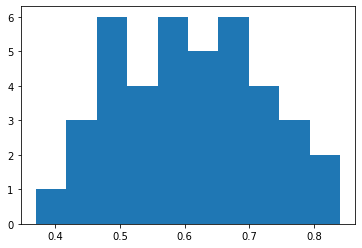

In [8]:
plt.hist(t4t_frac)

In [69]:
base_dir = '/home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/'
exp_dir = 'PPO_single_t4t/'
exp_dir = 'PPO_single_t4td/'

cp_path = "/checkpoint_000100/checkpoint-100"
exps = os.listdir(base_dir+exp_dir)
test_exp = exps[0]

In [70]:

t4t_frac = []
coop_frac = []
for test_exp in exps:
    path1 = base_dir+ exp_dir+test_exp
# path1 = base_dir+ exp_dir+run_dir

# path1='/home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/DQN_single_t4t'
# path1='/home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/DQN_single_t4t/DQN_MG_t4t_env_3dc73_00000_0_gamma=0.999,lr=0.001,n_step=1_2021-08-13_15-33-36'
    
    if os.path.exists(path1 + cp_path):
        with open(path1 + '/params.pkl', 'rb') as f:
            data = pickle.load(f)
        agent = PPOTrainer(config=data)
        agent.restore(path1+ cp_path, )
        t_frac, c_frac = evaluation.is_t4t(agent,100)
        t4t_frac.append(t_frac[0])
        coop_frac.append(c_frac)

2021-08-16 20:28:12,175	INFO trainable.py:106 -- Trainable.setup took 11.679 seconds. If your trainable is slow to initialize, consider setting reuse_actors=True to reduce actor creation overheads.
2021-08-16 20:28:12,184	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-16 20:28:12,334	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/PPO_single_t4td/PPO_MG_t4td_env_65543_00011_11_gamma=0.99,lr=5e-05_2021-08-14_10-03-08/checkpoint_000100/checkpoint-100
2021-08-16 20:28:12,335	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 37253.41027712822, '_episodes_total': 4000}
2021-08-16 20:28:25,297	INFO trainable.py:106 -- Trainable.setup took 12.109 seconds. If your trainable is slow to initialize, consider setting reuse_actors=True to reduce actor creation overheads.
2021-08-16 20:28:25,322	WARNING util.py:55 -- Install gputil

2021-08-16 20:30:01,754	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 37495.59412121773, '_episodes_total': 4000}
2021-08-16 20:30:08,982	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-16 20:30:09,176	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/PPO_single_t4td/PPO_MG_t4td_env_65543_00015_15_gamma=0.999,lr=1e-05_2021-08-14_20-27-02/checkpoint_000100/checkpoint-100
2021-08-16 20:30:09,204	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 36689.12459254265, '_episodes_total': 4000}
2021-08-16 20:30:16,606	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-16 20:30:16,716	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/PPO_single_t4td/PPO_MG_t4td_env

In [119]:
lr_options  = sorted(data1['lr'].unique())
gamma_options = sorted(data1['gamma'].unique())

ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan

for ii in range(len(data1)):
    lr_i = lr_options.index(data1.loc[ii].lr)
    
    gamma_i = gamma_options.index(data1.loc[ii].gamma)
        
    ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean

In [121]:
plt.pcolor(ep_mean_arr)

Figure(432x288)


2021-08-17 00:05:06,403	WARNING worker.py:1189 -- The autoscaler failed with the following error:
Traceback (most recent call last):
  File "/home/peter/anaconda3/lib/python3.8/site-packages/ray/autoscaler/_private/monitor.py", line 317, in run
    self._run()
  File "/home/peter/anaconda3/lib/python3.8/site-packages/ray/autoscaler/_private/monitor.py", line 207, in _run
    self.update_load_metrics()
  File "/home/peter/anaconda3/lib/python3.8/site-packages/ray/autoscaler/_private/monitor.py", line 169, in update_load_metrics
    response = self.gcs_node_resources_stub.GetAllResourceUsage(
  File "/home/peter/.local/lib/python3.8/site-packages/grpc/_channel.py", line 826, in __call__
    return _end_unary_response_blocking(state, call, False, None)
  File "/home/peter/.local/lib/python3.8/site-packages/grpc/_channel.py", line 729, in _end_unary_response_blocking
    raise _InactiveRpcError(state)
grpc._channel._InactiveRpcError: <_InactiveRpcError of RPC that terminated with:
	status 

In [68]:
t4t_frac

[0.46,
 0.51,
 0.46,
 0.56,
 0.49,
 0.49,
 0.57,
 0.46,
 0.52,
 0.48,
 0.43,
 0.49,
 0.42,
 0.54,
 0.55,
 0.54,
 0.51,
 0.53,
 0.52,
 0.52]

In [67]:
coop_frac

[0.7,
 1.0,
 1.0,
 0.8,
 0.56,
 1.0,
 0.6599999999999999,
 1.0,
 0.72,
 0.71,
 0.7,
 0.52,
 0.33999999999999997,
 0.56,
 1.0,
 0.74,
 0.5700000000000001,
 0.6599999999999999,
 0.76,
 0.54]

In [54]:
len(t4t_frac)

20

In [56]:

plt.plot(t4t_frac)
plt.show()

Figure(432x288)
